<a href="https://colab.research.google.com/github/BerkayBilici/berkaybilici/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA

In this document, we will analyze the clean_steam dataset through the following aspects:

* The overall relationship between game price and rating

*  The rating differences between paid and free games

*  The rating comparison between singleplayer and multiplayer games

*  The rating trends across different time periods, including the COVID-19 pandemic


In [52]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

# The libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# we are using the cleaned data
df = pd.read_csv("/content/drive/MyDrive/dsa210/clean_steam.csv")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     AppID                                    Name  Release date  Price  \
0   402890                             Nyctophilia  Sep 23, 2015   0.00   
1  1151740                         Prison Princess   Apr 2, 2020  19.99   
2   431510  Mystic Destinies: Serendipity of Aeons  Feb 11, 2016   0.00   
3  1154840                           Shadow Empire   Dec 3, 2020  39.99   
4   282010                    Carmageddon Max Pack  Jun 30, 1997   9.99   

   Positive  Negative                                         Categories  \
0       196       106                                      Single-player   
1       264        46  Single-player,Steam Achievements,Full controll...   
2       318        72  Single-player,Steam Achievements,Steam Trading...   
3      1145       168  Single-player,Multi-player,PvP,Shared/Split Sc...   
4       769       101  Single-player,Mul

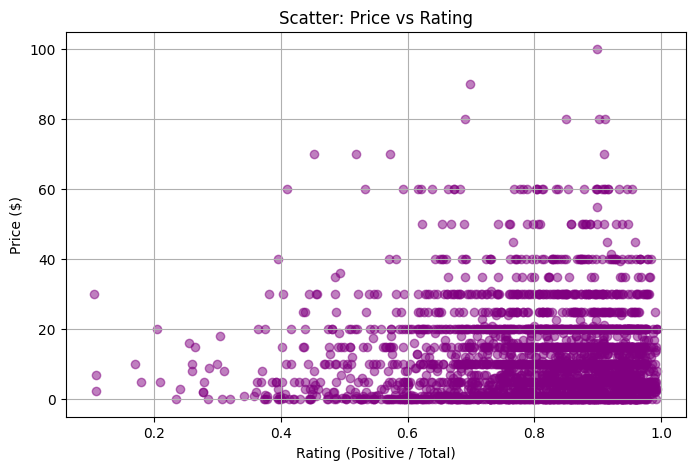

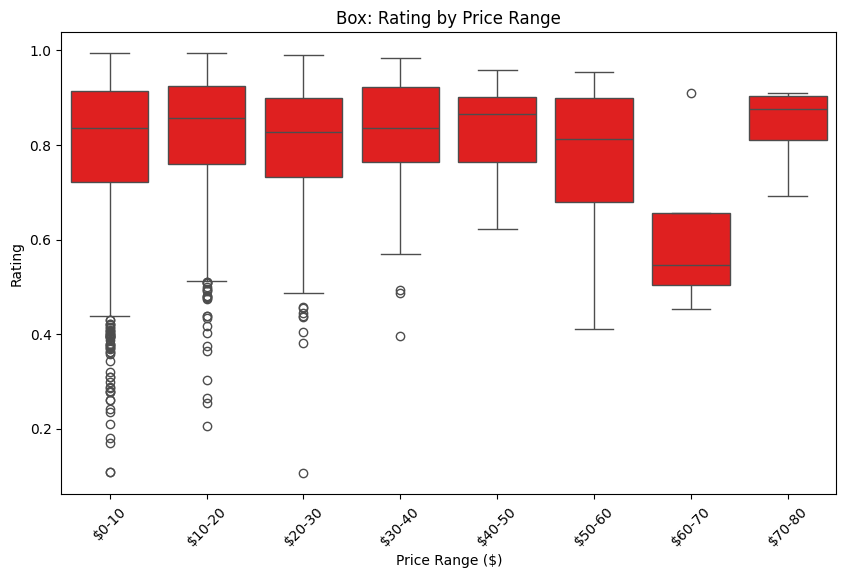

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Rating"], df["Price"], alpha=0.5, color='purple')
plt.title("Scatter: Price vs Rating")
plt.xlabel("Rating (Positive / Total)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

bins = list(range(0, 90, 10))
labels = [f"${i}-{i+10}" for i in bins[:-1]] # ı used some help from chatgpt here, couldn't do by myself
df["Price Range"] = pd.cut(df["Price"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Price Range", y="Rating", data=df, color='red')
plt.title("Box: Rating by Price Range")
plt.xlabel("Price Range ($)")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()




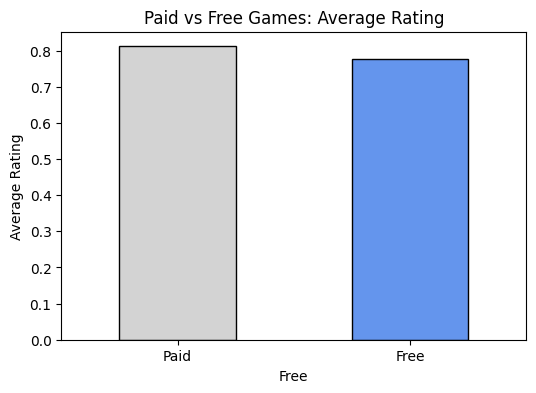

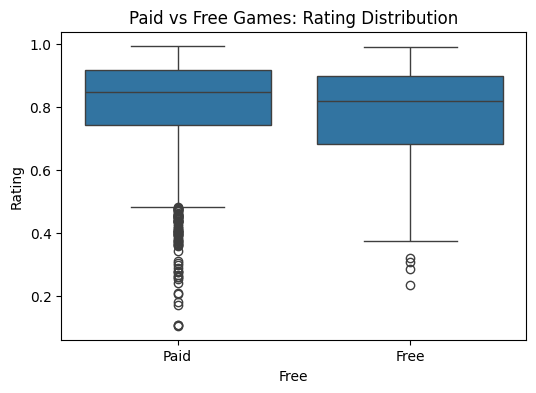

In [54]:
# creating free categorie
df["Free"] = df["Price"] == 0

# ────────── Bar Chart ──────────
mean_rating = df.groupby("Free")["Rating"].mean()
plt.figure(figsize=(6,4))
mean_rating.plot(kind="bar", color=["lightgray","cornflowerblue"], edgecolor="black")
plt.xticks([0,1], ["Paid","Free"], rotation=0)
plt.ylabel("Average Rating")
plt.title("Paid vs Free Games: Average Rating")
plt.show()

# ────────── Box Plot ──────────
plt.figure(figsize=(6,4))
sns.boxplot(x="Free", y="Rating", data=df,)
plt.xticks([0,1], ["Paid","Free"])
plt.ylabel("Rating")
plt.title("Paid vs Free Games: Rating Distribution")
plt.show()


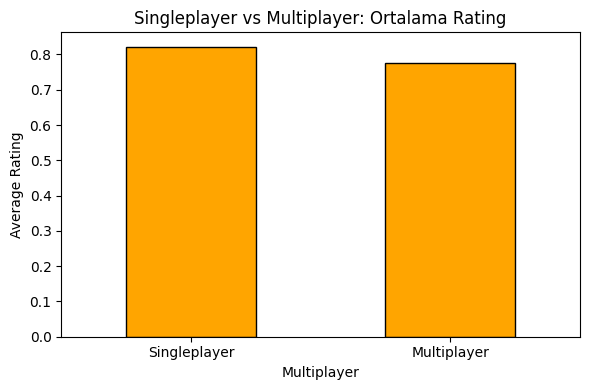

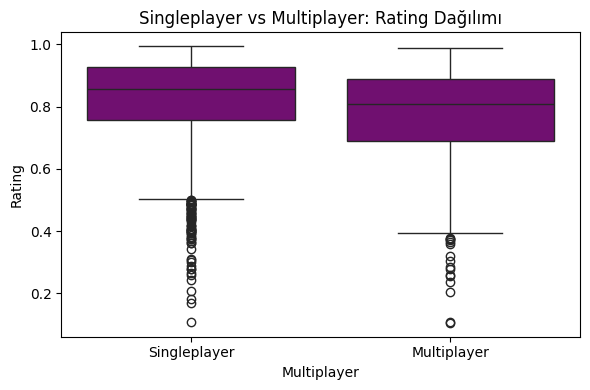

In [55]:

# creating the multiplayer categorie(used some help from chatgpt)
df["Multiplayer"] = df["Categories"].str.contains("Multi-player")

# Bar Chart
mean_rating = df.groupby("Multiplayer")["Rating"].mean()
plt.figure(figsize=(6, 4))
mean_rating.plot(
    kind="bar",
    color=["orange"],
    edgecolor="black"
)
plt.xticks([0,1], ["Singleplayer", "Multiplayer"], rotation=0)
plt.ylabel("Average Rating")
plt.title("Singleplayer vs Multiplayer: Ortalama Rating")
plt.tight_layout()
plt.show()

#Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="Multiplayer", y="Rating", data=df, color= 'purple'
)
plt.xticks([0,1], ["Singleplayer", "Multiplayer"])
plt.ylabel("Rating")
plt.title("Singleplayer vs Multiplayer: Rating Dağılımı")
plt.tight_layout()
plt.show()


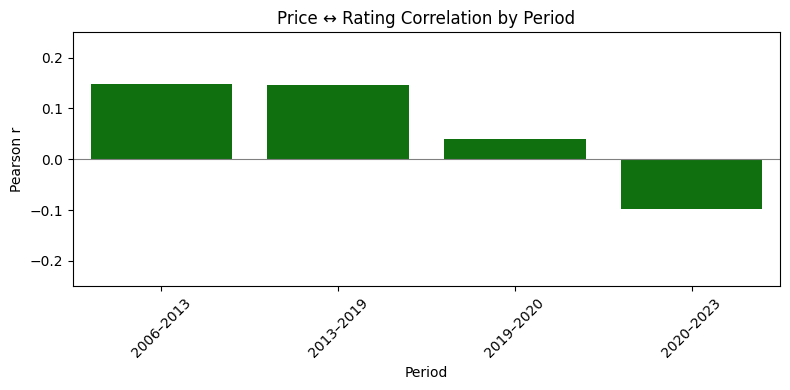

In [56]:
from scipy.stats import pearsonr

# 1) I used lot's of help from AI while calculating this graph.
df['Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

# 2) I spesificly analyzed the corona period to see if the relation changed or not.
bins   = [2006, 2013, 2019, 2020, 2023]
labels = ['2006–2013', '2013–2019', '2019–2020', '2020–2023']
df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# 3) I used pearson because i need to see the periods. if ı used rating-price, I needed to create 4 dsitinct graphs and it would look bad.
records = []# I used some here from AI aswell.
for period in labels:
    sub = df[df['Period']==period].dropna(subset=['Price','Rating'])
    if len(sub) >= 2:
        r, _ = pearsonr(sub['Price'], sub['Rating'])
    else:
        r = float('nan')
    records.append({'Period': period, 'Pearson_r': r})

corrs = pd.DataFrame(records)

# 4) Bar chart
plt.figure(figsize=(8,4))
sns.barplot(data=corrs, x='Period', y='Pearson_r', color='green')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Price ↔ Rating Correlation by Period')
plt.xlabel('Period')
plt.ylabel('Pearson r')
plt.ylim(-0.25,0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Research Objective:
This project aims to investigate how price, game modes (multiplayer/singleplayer), and distribution types (free/paid) affect the user ratings of Steam games, and whether these effects have changed over time.


# HYPOTHESES:
H1.
*  H₀: There is no correlation between a game’s price and its user rating.
*  H₁: There is a significant correlation between a game’s price and its user rating.

H2.
*  H₀: There is no significant difference in ratings between free and paid
games.
*  H₁: Paid games have significantly different ratings compared to free games.

H3.
*  H₀: There is no significant difference in ratings between multiplayer and singleplayer games.
*  H₁: Multiplayer and singleplayer games have significantly different ratings.

H4.
*  H₀: The relationship (correlation) between price and rating has not significantly changed across release period
*  H₁: The relationship (correlation) between price and rating has significantly changed across release periods.

# GENERAL RULE
If p value is less than 0.05, we are able to reject H0.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




H1.
*  H₀: There is no correlation between a game’s price and its user rating.
*  H₁: There is a significant correlation between a game’s price and its user rating.


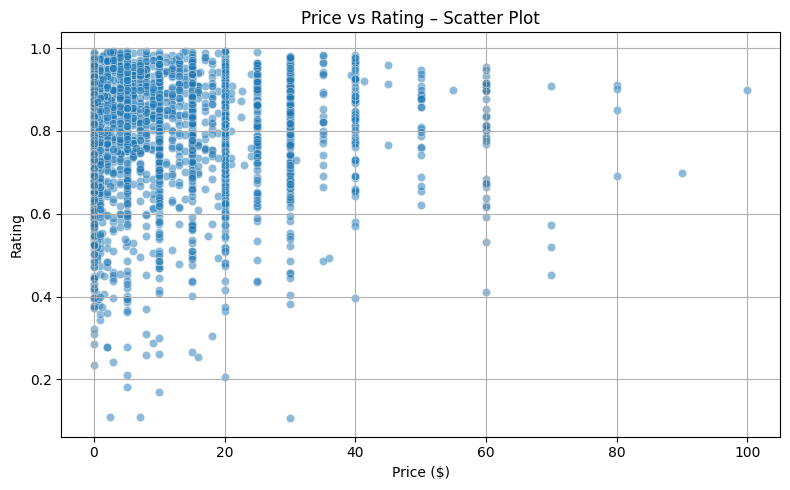

Pearson correlation: 0.0449  | p-value: 0.0204
Spearman correlation: 0.0637  | p-value: 0.001


In [57]:
df.dropna(subset=["Price", "Rating"], inplace=True)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Price", y="Rating", data=df, alpha=0.5)
plt.title("Price vs Rating – Scatter Plot")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(df["Price"], df["Rating"])
spearman_r, spearman_p = spearmanr(df["Price"], df["Rating"])

print("Pearson correlation:", round(pearson_r, 4), " | p-value:", round(pearson_p, 4))
print("Spearman correlation:", round(spearman_r, 4), " | p-value:", round(spearman_p, 4))


In both spearman and pearson, p value is significantly smaller than 0.05. Thus, we are able to reject H0.

-----------------------------------------------------------------------------------------------------------------------

H2.
*  H₀: There is no significant difference in ratings between free and paid
games.
*  H₁: Paid games have significantly different ratings compared to free games.


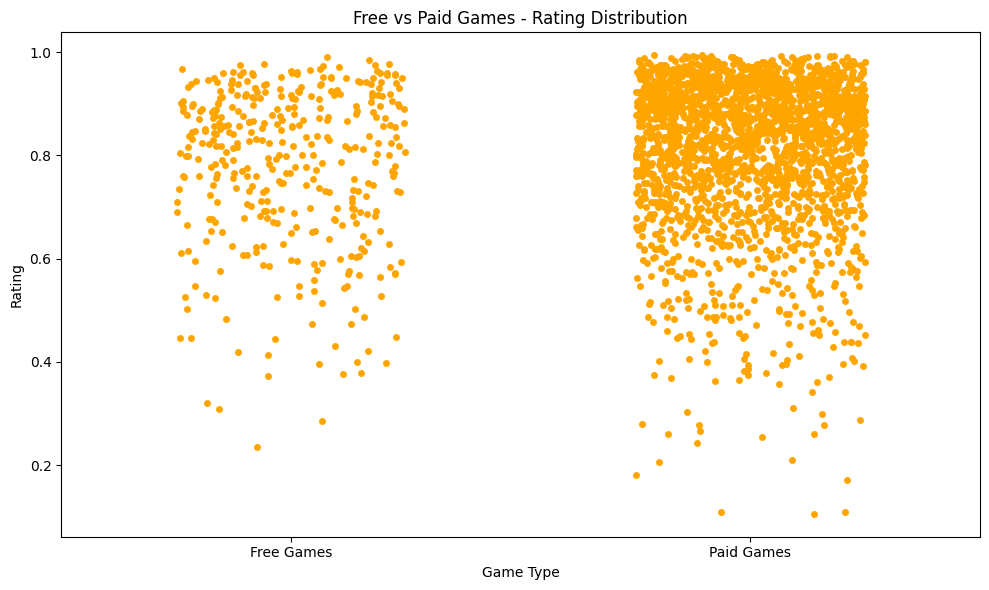

T-statistic: -4.0443
P-value:     0.0001


In [58]:

plt.figure(figsize=(10,6))
sns.stripplot(x=(df['Price'] > 0), y='Rating', data=df, jitter=0.25, color='orange')
plt.xticks([0,1], ['Free Games', 'Paid Games'])
plt.title('Free vs Paid Games - Rating Distribution')
plt.xlabel('Game Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

from scipy.stats import ttest_ind

df['Type'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')


# t-test
free_ratings = df[df['Type'] == 'Free']['Rating']
paid_ratings = df[df['Type'] == 'Paid']['Rating']

t_stat, p_val = ttest_ind(free_ratings, paid_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.4f}")


note about the graph: This scatter plot compares the rating distributions of free and paid games. While both types generally receive high ratings, free games tend to show slightly more variation and outliers.(for the graph ı used help from chatgpt.)

Based on the t-test and the p-value, we reject the null hypothesis(H0). The results show that free games are rated significantly higher than paid games.


----------------------------------------------------------------------------------------------------------------------------------------------------------------


H3.

*  H₀: There is no significant difference in ratings between multiplayer and singleplayer games.
*  H₁: Multiplayer and singleplayer games have significantly different ratings.

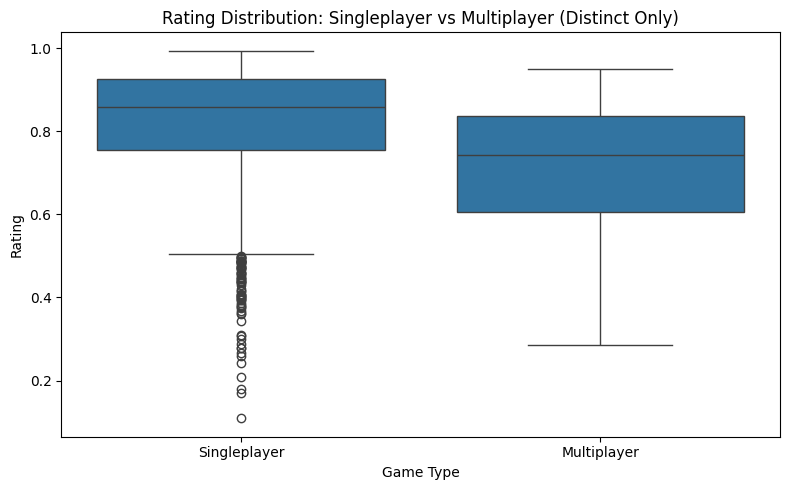

T-statistic: 7.9835
P-value:     0.0000


In [59]:
# 1) create categories
df['Singleplayer'] = df['Categories'].str.contains("Single-player", na=False)
df['Multiplayer'] = df['Categories'].str.contains("Multi-player", na=False)

only_single = df[df['Singleplayer'] & ~df['Multiplayer']]
only_multi = df[df['Multiplayer'] & ~df['Singleplayer']]

# 3) Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.concat([only_single.assign(Type='Singleplayer'),
                            only_multi.assign(Type='Multiplayer')]),
            x='Type', y='Rating')
plt.title('Rating Distribution: Singleplayer vs Multiplayer (Distinct Only)')
plt.xlabel('Game Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# 4) T-test
t_stat, p_val = ttest_ind(only_single['Rating'], only_multi['Rating'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.4f}")


Based on the t-test results, we reject the null hypothesis(H0). Singleplayer games are rated significantly higher than multiplayer games.


--------------------------------------------------------------------------------------------------------------------------------------------------------------



H4.
*  H₀: The relationship (correlation) between price and rating has not significantly changed across release period
*  H₁: The relationship (correlation) between price and rating has significantly changed across release periods.

<ipython-input-60-38de2f2d8f36>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for period, subset in df.groupby('Period'):


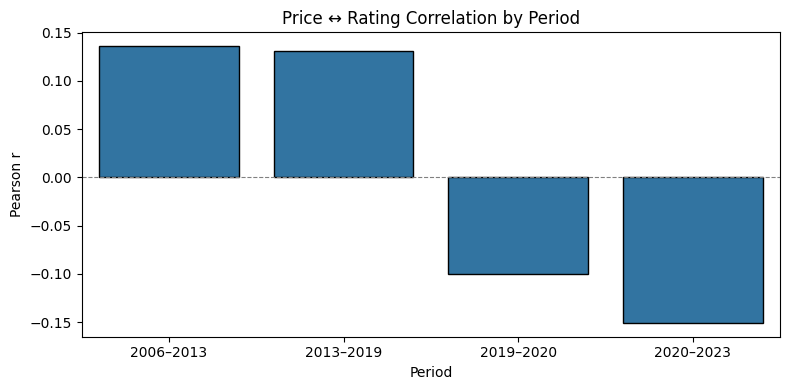

      Period  Pearson_r   P_value
0  2006–2013   0.135986  0.034113
1  2013–2019   0.130641  0.000002
2  2019–2020  -0.099659  0.099100
3  2020–2023  -0.150823  0.000014


In [60]:

# ı spesificly evaluated corona period.
df['Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year
bins = [2006, 2013, 2019, 2020, 2024]
labels = ['2006–2013', '2013–2019', '2019–2020', '2020–2023']
df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels)

# calculate pearson r and correlation
results = []
for period, subset in df.groupby('Period'):
    if len(subset) > 1:
        r, p = pearsonr(subset['Price'], subset['Rating'])
        results.append({'Period': period, 'Pearson_r': r, 'P_value': p})
    else:
        results.append({'Period': period, 'Pearson_r': None, 'P_value': None})
corrs_df = pd.DataFrame(results)

# Bar Chart
plt.figure(figsize=(8, 4))
sns.barplot(data=corrs_df, x='Period', y='Pearson_r', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Price ↔ Rating Correlation by Period')
plt.ylabel('Pearson r')
plt.xlabel('Period')
plt.tight_layout()
plt.show()
print(corrs_df)


The correlation between price and rating has shifted from slightly positive to negative over the years.
This change is large enough to reject H₀ and accept that the relationship has evolved over time.


ML

Mounted at /content/drive
Linear Regression Results:
 - MSE: 0.016
 - R²: 0.153



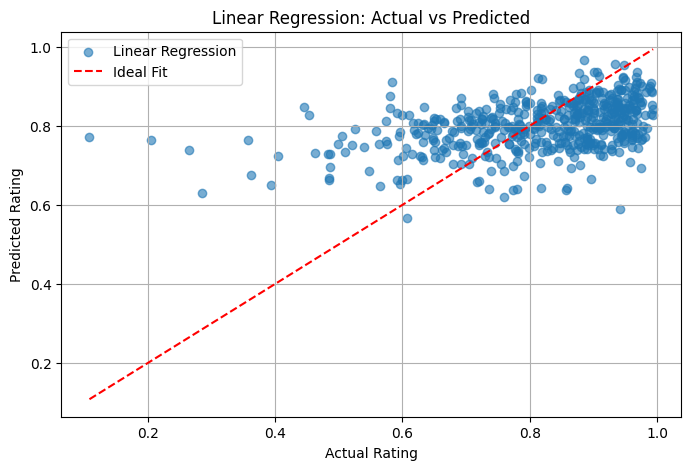

Decision Tree Results:
 - MSE: 0.035
 - R²: -0.856



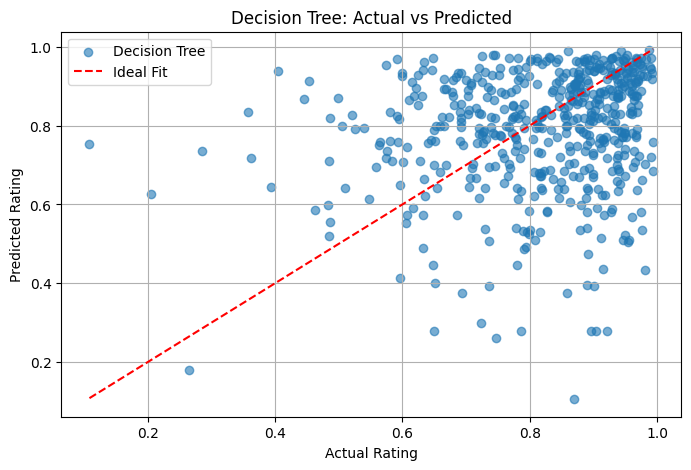

Random Forest Results:
 - MSE: 0.016
 - R²: 0.162



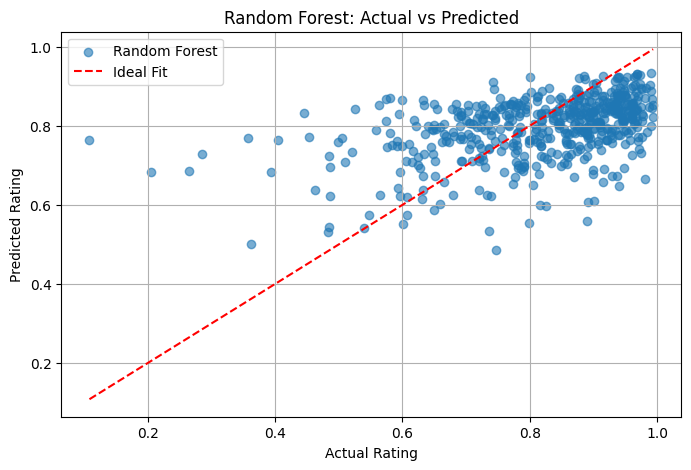

🏆 Best Performing Model: Random Forest with R² = 0.162


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1) Mount Drive if in Colab
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    base_path = '/content/drive/MyDrive/dsa210'
except ImportError:
    base_path = os.getcwd()

# 2) Load the enhanced dataset
file_path = os.path.join(base_path, 'clean_steam_enhanced.csv')
df = pd.read_csv(file_path)

# 3) Recompute binary flags (they weren't included in enhanced file)
df['IsFree'] = (df['Price'] == 0).astype(int)
df['Singleplayer'] = df['Categories'].str.contains("Single-player", na=False).astype(int)
df['Multiplayer']  = df['Categories'].str.contains("Multi-player", na=False).astype(int)
df['IsMultiplayer'] = df['Multiplayer'] * (1 - df['Singleplayer'])

# 4) Define features and target
numeric_features = [
    'LogPrice', 'TotalReviews', 'OwnersNum', 'LogPeakCCU',
    'ReleaseYear', 'ReleaseMonth', 'CategoryCount', 'GenreCount', 'TagCount'
]
binary_features = ['IsFree', 'IsMultiplayer']
onehot_features = [c for c in df.columns if c.startswith('Genre_') or c.startswith('Tier_')]

X = df[numeric_features + binary_features + onehot_features]
y = df['Rating']

# 5) Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6) Define models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 7) Train, predict, evaluate
from sklearn.metrics import mean_squared_error, r2_score
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} Results:\n - MSE: {mse:.3f}\n - R²: {r2:.3f}\n")

    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label='Ideal Fit')
    plt.title(f"{name}: Actual vs Predicted")
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.legend()
    plt.grid(True)
    plt.show()

# 8) Best model
best = max(results, key=lambda k: results[k]['R²'])
print(f"🏆 Best Performing Model: {best} with R² = {results[best]['R²']:.3f}")


